In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [13]:
# Use glob.glob() to read in the names of all the '*.csv' files
files = glob.glob('*.csv')
print(files[0])

Teff8649logg4.824.csv


In [37]:
# Write code to read in the data in the first file. You can use the 
# "loadtxt" command with the appropriate values set for "skiprows" and "delimiter".
# Store the values in the columns labelled "Mag" and "Magerr" in variable names
# of your own choosing.
Mag, Magerr = np.loadtxt(files[0], delimiter=',', skiprows=1, usecols=(1,2), unpack=True)
print(Mag)

[15.81 15.91 15.99 15.96 15.97 15.97 15.97 15.95 16.02 16.01 15.99 16.
 15.93 15.92 15.91 15.9  15.97 15.98 15.96 15.98 15.91 15.92 15.94 15.93
 15.97 15.97 15.96 15.95 15.98 15.96 15.97 15.96 15.96 15.96 15.97 15.97
 15.94 15.95 15.96 15.96 15.94 15.93 15.93 15.96 15.93 15.94 15.93 15.94
 15.95 15.96 15.96 15.94 15.97 15.98 15.98 15.97 15.99 16.01 15.98 15.98]


In [34]:
# Write a function that takes as arguments the list "Mag" and the list "Magerr" from 
# the previous cell. Calculate the standard deviation of "Mag", and divide it by the
# average of "Magerr", and return this value. Test this on the data from the file in 
# the cell above to make sure it doesn't cause an error. 
def testVariance(magnitude, mag_error):
    return np.std(magnitude)/np.mean(mag_error)
print(testVariance(Mag, Magerr))

0.5490235630376121


In [44]:
# To help simplify this lab a little, we provide the function below. If you call it
# with one of the names of the *.csv files, it will pull out the part of the name
# that gives the Teff of the star (as well as its log g value) and return them.
# 
def get_vals(fname):
    Teff = fname[4:8]
    logg = fname[12:17]
    Teff = float(Teff)
    logg = float(logg)
    return Teff,logg
    


In [46]:
# Now, write a for loop that goes through the full list of files. Build up in stages what
# the loop does. First, have it print out the name of each file. Then add in the above
# "get_vals()" command to calculate the temperature and gravity contained in each file name. 
# Now, go back and add in the loadtxt command, so that you read in the list of magnitudes and 
# the errors on the magnitudes for each star. Finally, call the function that you wrote which 
# divides the standard deviation of the magnitudes by "Magerr" to calculate the extra variability 
# that each object possesses.
T_eff = []
var_metric = []
for file in files:
    Mag, Magerr = np.loadtxt(file, delimiter=',', skiprows=1, usecols=(1,2), unpack=True)
    T_eff.append(get_vals(file)[0])
    var_metric.append(testVariance(Mag, Magerr))
    print(file, get_vals(file), testVariance(Mag, Magerr))

Teff8649logg4.824.csv (8649.0, 4.824) 0.5490235630376121
Teff8633logg5.129.csv (8633.0, 5.129) 0.6449346819210732
Teff8197logg5.568.csv (8197.0, 5.568) 0.7475710513448904
Teff7943logg5.611.csv (7943.0, 5.611) 0.7382399057454555
Teff7228logg4.838.csv (7228.0, 4.838) 0.6908349079083015
Teff8557logg5.061.csv (8557.0, 5.061) 0.8334910077218349
Teff7602logg4.986.csv (7602.0, 4.986) 1.0200889253761465
Teff7785logg5.040.csv (7785.0, 5.04) 2.045056493131193
Teff7364logg4.906.csv (7364.0, 4.906) 3.084745983085907
Teff7822logg5.350.csv (7822.0, 5.35) 0.7647380749518917
Teff7811logg5.354.csv (7811.0, 5.354) 0.4622742524925437
Teff8335logg4.938.csv (8335.0, 4.938) 0.6028100016438537
Teff7554logg5.012.csv (7554.0, 5.012) 0.9137991505869875
Teff7346logg4.987.csv (7346.0, 4.987) 0.8482494724622464
Teff7594logg4.929.csv (7594.0, 4.929) 2.5924168436988726
Teff8200logg4.820.csv (8200.0, 4.82) 4.383257998002345
Teff7481logg5.056.csv (7481.0, 5.056) 0.49680598973864654
Teff6875logg5.344.csv (6875.0, 5.344

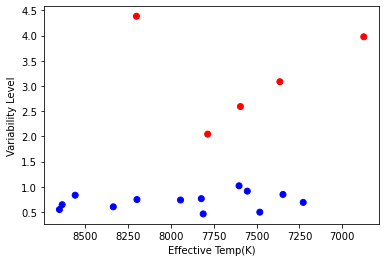

In [62]:
# Make a scatter plot (Google "plt.scatter()") of this: Plot variability (y-axis) versus temperature (x-axis). 
# Once you have it looking the way you want, save a copy to disk (Google "plt.savefig"). 
color = np.where(np.array(var_metric)<1.2,'b','r')
mark = []
h = plt.scatter(T_eff,var_metric, c=color)
plt.gca().invert_xaxis()
plt.xlabel('Effective Temp(K)')
plt.ylabel('Variability Level')
plt.savefig("Lab2Plot")

In [ ]:
# Also, save a PDF copy of your Jupyter Notebook to disk (in the notebook menu do "File > Print Preview", 
# and when the preview shows up do "File > Export as PDF" from the Safari menu **at the top of the screen**).
# Submit both the PDF of the figure and the notebook on Canvas...